In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
beerData = pd.read_csv('AusBeerProduction.csv', names = ['month', 'beerProduction'], header=0)
beerData.head()

,month,beerProduction
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
def countNan(dataset):
    for col in dataset.columns.tolist():
        naCount = sum(pd.isna(dataset[col]))
        print(str(col) + ": " + str(naCount))

countNan(beerData)

month: 0
beerProduction: 0


In [4]:
beerData.shape

(476, 2)

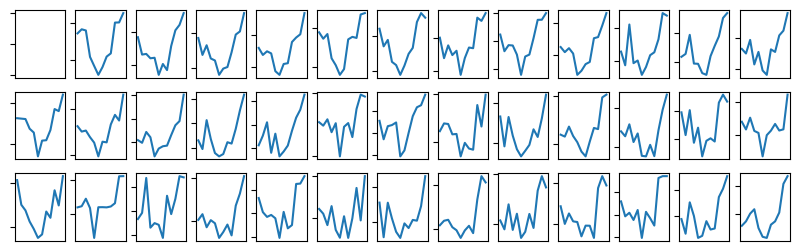

In [10]:
j=0
fig, axs = plt.subplots(3, 13, figsize=(10, 3))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.plot(beerData.month[j:i*12], beerData.beerProduction[j:i*12])
    j = i*12
    ax.set_xticks([])  
    ax.set_xticks([])  
    ax.set_xticklabels([])  
    ax.set_yticklabels([])
plt.show()

#Due to approximation, not all data at the end is plotted.....

Auto regressive model

In [6]:
ar_model = sm.tsa.AutoReg(beerData.beerProduction[0:452], lags=15)
ar_result = ar_model.fit() 
forecast = ar_result.predict(start=len(beerData.beerProduction)-11, end=len(beerData.beerProduction))

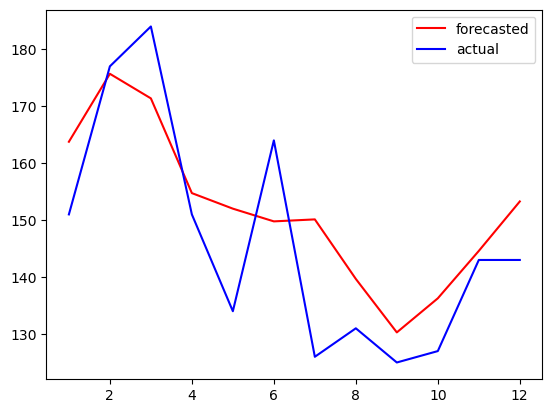

In [7]:
plt.plot(list(range(1, 13)), forecast, color='red', label='forecasted')
plt.plot(list(range(1,13)), beerData.beerProduction[453:465], color='blue', label='actual')
plt.legend()
plt.show()